# Function Spec
We need a python function that when given a list will return a sequence of the neighboring pairs.

E.g.

    Input: [1,3,5,7]
    Output: [(3,1),(5,3),(7,5)]
    
Note: Definition of **neighboring pair**: two numbers are *physically*  neightbors.

Assumption: 
1. The numbers are integer.
2. The numbers in the output tuple pairs are in reversed order.


## Setup

In [1]:
import sys
import gc

from itertools import tee, islice
from timeit import default_timer as timer
from memory_profiler import memory_usage

import numpy as np
from numpy.random import randint

import seaborn as sns
from matplotlib import pyplot as plt

np.random.seed(42)
sns.set()

%load_ext memory_profiler

## Task A - Function Implementation

####  Implementation 1: Naive

In [2]:
def get_neighboring_pair_naive(nums):
    if nums is None or len(nums) == 0 or len(nums) == 1:
        return []
    
    return [(nums[i], nums[i - 1]) for i in range(1, len(nums))]

####  Implementation 2: Using python zip to store neighboring numbers

In [3]:
def get_neighboring_pair_zip(nums):
    if nums is None or len(nums) == 0 or len(nums) == 1:
        return []
    return list(zip(nums[1:], nums))

In [4]:
def get_neighboring_pair_iter(nums):
    if nums is None or len(nums) == 0 or len(nums) == 1:
        return []
    iter1, iter2 = tee(nums)
    next(iter1)
    return list(zip(iter1, iter2))

In [5]:
test_data = [1,3,5,7]
print(get_neighboring_pair_iter(test_data))

[(3, 1), (5, 3), (7, 5)]


## Task B - Unit Tests

In [6]:
import unittest

class TestFooBase:
    def test_input_none(self):
        self.assertEqual(self.impl(None), [])
    
    def test_input_empty(self):
        self.assertEqual(self.impl([]), [])

    def test_input_single_number(self):
        self.assertEqual(self.impl([1]), [])
        
    def test_sample_case_1(self):
        self.assertEqual(self.impl([1,3,5,7]), [(3,1),(5,3),(7,5)])

    def test_sample_case_2(self):
        self.assertEqual(self.impl([3,1,7,5]), [(1,3),(7,1),(5,7)])

    def test_list_too_large(self):
        with self.assertRaises(MemoryError):
            self.impl([1]*(sys.maxsize))

class TestGetNeighboringPairNaive(unittest.TestCase, TestFooBase):
    impl = staticmethod(get_neighboring_pair_naive)
    
class TestGetNeighboringPairZip(unittest.TestCase, TestFooBase):
    impl = staticmethod(get_neighboring_pair_zip)
    
class TestGetNeighboringPairIter(unittest.TestCase, TestFooBase):
    impl = staticmethod(get_neighboring_pair_iter)
    
unittest.main(argv=[''], verbosity=2, exit=False)

test_input_empty (__main__.TestGetNeighboringPairIter) ... ok
test_input_none (__main__.TestGetNeighboringPairIter) ... ok
test_input_single_number (__main__.TestGetNeighboringPairIter) ... ok
test_list_too_large (__main__.TestGetNeighboringPairIter) ... ok
test_sample_case_1 (__main__.TestGetNeighboringPairIter) ... ok
test_sample_case_2 (__main__.TestGetNeighboringPairIter) ... ok
test_input_empty (__main__.TestGetNeighboringPairNaive) ... ok
test_input_none (__main__.TestGetNeighboringPairNaive) ... ok
test_input_single_number (__main__.TestGetNeighboringPairNaive) ... ok
test_list_too_large (__main__.TestGetNeighboringPairNaive) ... ok
test_sample_case_1 (__main__.TestGetNeighboringPairNaive) ... ok
test_sample_case_2 (__main__.TestGetNeighboringPairNaive) ... ok
test_input_empty (__main__.TestGetNeighboringPairZip) ... ok
test_input_none (__main__.TestGetNeighboringPairZip) ... ok
test_input_single_number (__main__.TestGetNeighboringPairZip) ... ok
test_list_too_large (__main__.Te

## Task C - Performance Testing

#### Time complexity comparision

In [7]:
def generate_random_data_in_order(test_data_order):
    max_int = pow(10,9)
    min_int = -pow(10,9)
    res = []
    for order in test_data_order:
        res.append(randint(min_int, max_int, pow(10, order)))
                   
    return res

In [8]:
def measure_func_elasped_time(total_test_data, func):
    res = []
    for test_data in total_test_data:
        start = timer()
        func(test_data)
        end = timer()
        res.append(end - start)
    return res

In [9]:
test_data_order = [1,7]
total_test_data = generate_random_data_in_order(test_data_order)
test_data_number = [pow(10, order) for order in test_data_order]

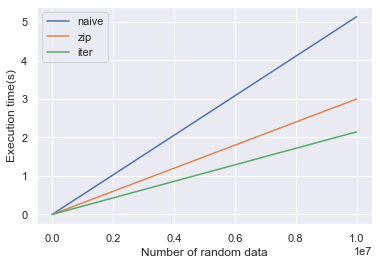

In [10]:
fig = plt.figure()
plt.xlabel("Number of random data")
plt.ylabel("Execution time(s)")

plt.plot(test_data_number, measure_func_elasped_time(total_test_data, get_neighboring_pair_naive), label="naive")
plt.plot(test_data_number, measure_func_elasped_time(total_test_data, get_neighboring_pair_zip), label="zip")
plt.plot(test_data_number, measure_func_elasped_time(total_test_data, get_neighboring_pair_iter), label="iter")

plt.legend(loc="upper left")

#### Space complexity comparision

In [11]:
def measure_func_peak_memory_usage(total_test_data, func):
    res = []
    for test_data in total_test_data:
        res.append(memory_usage((func, (test_data,), {}), max_usage=True))
    return res

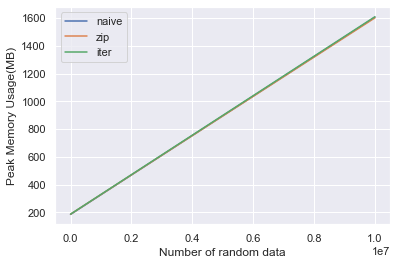

In [12]:
fig = plt.figure()
plt.xlabel("Number of random data")
plt.ylabel("Peak Memory Usage(MB)")

plt.plot(test_data_number, measure_func_peak_memory_usage(total_test_data, get_neighboring_pair_naive), label="naive")
plt.plot(test_data_number, measure_func_peak_memory_usage(total_test_data, get_neighboring_pair_zip), label="zip")
plt.plot(test_data_number, measure_func_peak_memory_usage(total_test_data, get_neighboring_pair_zip), label="iter")

plt.legend(loc="upper left")

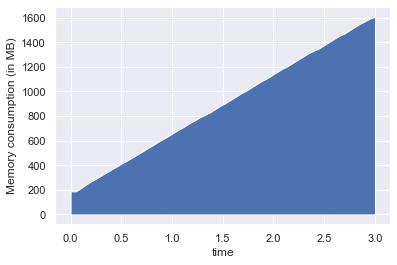

In [13]:
import pylab as pl
mem_naive = memory_usage((get_neighboring_pair_naive, (total_test_data[-1],), {}), interval=.05)
x = np.linspace(0, len(mem_naive) * .05, len(mem_naive))
p = pl.fill_between(x, mem_naive)
pl.xlabel('time')
pl.ylabel('Memory consumption (in MB)')
pl.show()

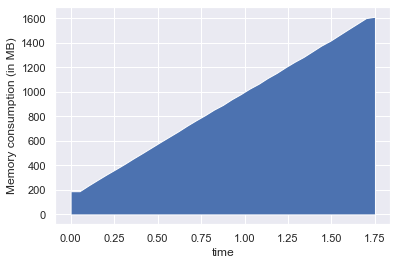

In [14]:
mem_zip = memory_usage((get_neighboring_pair_zip, (total_test_data[-1],), {}), interval=.05)
x = np.linspace(0, len(mem_zip) * .05, len(mem_zip))
p = pl.fill_between(x, mem_zip)
pl.xlabel('time')
pl.ylabel('Memory consumption (in MB)')
pl.show()

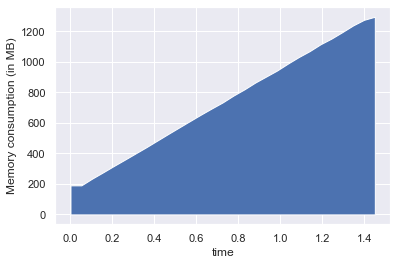

In [15]:
mem_iter = memory_usage((get_neighboring_pair_iter, (total_test_data[-1],), {}), interval=.05)
x = np.linspace(0, len(mem_iter) * .05, len(mem_iter))
p = pl.fill_between(x, mem_iter)
pl.xlabel('time')
pl.ylabel('Memory consumption (in MB)')
pl.show()